In [1]:
# install packages
import sys
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy

You are using pip version 9.0.1, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


In [3]:
# Make them work for not starting at 1, for multiple components

In [4]:
def BFS(adjacency_dict, target,start=1):
    visited_bfs = [start]
    next_layer = [start]
    num_steps = 0
    while (len(next_layer) > 0):
        current_layer = next_layer
        next_layer = []

        for vertex in current_layer:
            
            for neighbor in [x for x in adjacency_dict[vertex] if x not in visited_bfs]:
                num_steps += 1
                if target[neighbor]:
                    
                    return neighbor, num_steps, visited_bfs
                else:
                    visited_bfs.append(neighbor)
                next_layer.append(neighbor)
    return None, num_steps, visited_bfs

In [5]:
def DFS(adjacency_dict, target, start = 1):
    return call_DFS(adjacency_dict, target,start=start, current = start, visited_dfs = [start])

def call_DFS(adjacency_dict, target, start=1, current = 1, visited_dfs = [1], backtrack = {}):
    """Perform depth first search for 'true' targets given adjacency dictionary"""
#     print("current",current)
#     print("backtrack",backtrack)
#     print("visited",visited_dfs)
#     print("backtrack",backtrack)

#     # if we have visited all vertices without finding a 'true' vertex, return None
#     # This means there are no 'true' vertices in the graph
#     if len(visited_dfs) == max(adjacency_dict):
#         return None, len(visited_dfs), visited_dfs
    
    # Find all unvisited neighbors of current vertex
    unvisited_neighbors = [x for x in adjacency_dict[current] if x not in visited_dfs]
    
#     print("unvisited neighbors: {}\ncurrent: {}\nvisited: {}\nbacktrack: {}".format(unvisited_neighbors,current,visited_dfs,backtrack))
    # if there are no unvisited neighbors, every vertex "further down" in the tree has been searched
    # Backtrack to the previous vertex and perform DFS from there
    if len(unvisited_neighbors) == 0:
        if current == start:
            return None, len(visited_dfs), visited_dfs
        return call_DFS(adjacency_dict, target, start = start,current = backtrack[current],visited_dfs = visited_dfs,backtrack = backtrack)

#         except:
#             print("unvisited neighbors: {}\ncurrent: {}\nvisited: {}\nbacktrack: {}".format(unvisited_neighbors,current,visited_dfs,backtrack))

    # choose an unvisited vertex, neighbor of the current vertex, to visit next
    next_vertex = min(unvisited_neighbors)

    # keep track of the edge between the current vertex and the next vertex so 
    # we can backtrack in the future if necessary
    backtrack[next_vertex] = current
    
    # if the next vertex is 'true', return it
    if target[next_vertex]:
        return next_vertex, len(visited_dfs), visited_dfs
    
    # if not, mark that the next vertex has been visited, and continue the algorithm from there
    visited_dfs.append(next_vertex)
    return call_DFS(adjacency_dict, target, start=start,current = next_vertex,visited_dfs = visited_dfs,backtrack = backtrack)

In [6]:
def add_edge(adjacency_dict, weights,curr_edges):
    v1 = np.random.choice(list(adjacency_dict.keys()))
    v2 = np.random.choice(list(adjacency_dict.keys()))
    
    if ((v1 != v2) and (v1 not in adjacency_dict[v2])):
        adjacency_dict[v1].append(v2)
        adjacency_dict[v2].append(v1)
        weight = np.random.poisson(5) + 1
        weights[(v1,v2)] = weight
        weights[(v2,v1)] = weight
        curr_edges += 1
    return adjacency_dict, weights, curr_edges

In [7]:
def create_graph(num_vertices, num_edges, force_connected=True):
    weights = {}
    adjacency_dict = {k : [] for k in range(1,num_vertices + 1)}
    curr_edges = 0
    while (curr_edges < num_edges):
        adjacency_dict, weights, curr_edges = add_edge(adjacency_dict, weights, curr_edges)
    if force_connected:
        while not is_connected(adjacency_dict):
            adjacency_dict, weights, curr_edges = add_edge(adjacency_dict, weights, curr_edges)
    return adjacency_dict, weights

In [8]:
def contains_cycle(adjacency_dict):
    unvisited = list(adjacency_dict.keys())
    while(len(unvisited) > 0):
        _, _, visited = DFS(adjacency_dict, defaultdict(lambda : False), unvisited[0])
        component_degrees = 0
        for k, v in adjacency_dict.items():
            if k in visited:
                component_degrees += len([i for i in v if i in visited])
        component_edges = component_degrees/2
        if component_edges > len(visited) - 1:
            return True
        unvisited = [i for i in unvisited if i not in visited]
    return False

In [9]:
def is_connected(adjacency_dict):
    _, _, visited = DFS(adjacency_dict, defaultdict(lambda : False), list(adjacency_dict.keys())[0])
    if len(visited) < len(adjacency_dict):
        return False
    return True

In [10]:
def draw_adj(adjacency_dict,weights=defaultdict(lambda : 1),draw_weights=False, tree = defaultdict(lambda : [])):
    g = nx.Graph()
    for v1, val in adjacency_dict.items():
        for v2 in val:
            if v2 in tree[v1]:
                color = "lightgreen"
            else:
                color = "black"
            g.add_edge(v1,v2,color = color,weight=weights[(v1,v2)])
        if len(val) == 0:
            g.add_node(v1)
    my_pos = nx.spring_layout(g, seed = 100)
    plt.figure(figsize=(fig_size,fig_size)) 
#     nx.draw(g, pos=my_pos,with_labels=True,node_color="silver")
    edges = g.edges()
    colors = [g[u][v]['color'] for u,v in edges]
    weights = [g[u][v]['weight'] for u,v in edges]
    nx.draw(g, pos=my_pos,  edge_color=colors, width=weights,with_labels=True,node_color = "silver")

    if draw_weights:
        labels = nx.get_edge_attributes(g,'weight')
        nx.draw_networkx_edge_labels(g,my_pos,edge_labels=labels)
    plt.show()

In [11]:
def kruskal(adjacency_dict, weights):

    sorted_edges = sorted(weights, key=weights.get)
    print(sorted_edges)
    weight = 0

    min_tree = {k : [] for k in adjacency_dict.keys()}
    if not is_connected(adjacency_dict):
        return None
    
    edge_index = 0
    while (not is_connected(min_tree)):
        edge = sorted_edges[edge_index]
#         print(edge_index)
#         print("min_tree",min_tree)

        min_tree[edge[0]].append(edge[1])
        min_tree[edge[1]].append(edge[0])

        if contains_cycle(min_tree):
            min_tree[edge[0]] = min_tree[edge[0]][:-1]
            min_tree[edge[1]] = min_tree[edge[1]][:-1]
        else:

            weight += weights[(edge[0],edge[1])]
        edge_index += 1
    return min_tree,weight

In [12]:
def create_search_tree(vertex_limit, poisson_param, p, seed, close_solutions):
    np.random.seed(seed)
    adjacency_dict = {1 : []}
    count = 1
    curr_vertex = 1


    colors = ["dodgerblue"]
    sizes = [100]
    vertex_color = {1: "lightgreen", 0: "silver"}
    vertex_size = {1: 100, 0: 25}
    success_dict = {1 : True, 0 : False}
    layer = 1
    target = {1 : False}

    layer_vertices = [1]
    next_layer_vertices = []
    layer = 1



    while (count < vertex_limit):

        num_neighbors = np.random.poisson(lam=max(1,poisson_param - curr_vertex + 1)) + 1

        if curr_vertex in layer_vertices:

            next_layer_vertices += list(range(count + 1, count + 1 + num_neighbors))

        else:

            layer_vertices = next_layer_vertices
            next_layer_vertices = list(range(count + 1, count + 1 + num_neighbors))
            layer += 1

        for neighbor in range(num_neighbors):
            count += 1

            adjacency_dict[curr_vertex].append(count)
            adjacency_dict[count] = [curr_vertex]

            if close_solutions:
                success = np.random.binomial(1, p**layer)
            else:
                success = np.random.binomial(1, p**(max(1,6 - layer)))

            target[count] = success_dict[success]
            colors.append(vertex_color[success])
            sizes.append(vertex_size[success])

        curr_vertex += 1

    g = nx.Graph()
    for v1, val in adjacency_dict.items():
        for v2 in val:
            g.add_edge(v1,v2,)
        if len(val) == 0:
            g.add_node(v1)
    my_pos = nx.spring_layout(g, seed = 100)
    return adjacency_dict, target, colors, sizes, g, my_pos

# Search Algorithms

In [13]:
# graph parameters
seed = 123
vertex_limit = 25
poisson_param = 3
p = 0.6
close_solutions = False
adjacency_dict, target, colors, sizes, g, my_pos = create_search_tree(vertex_limit, poisson_param, p, seed, close_solutions)

In [14]:
# figure parameters
fig_size = 4
small_size = 25
large_size = 100

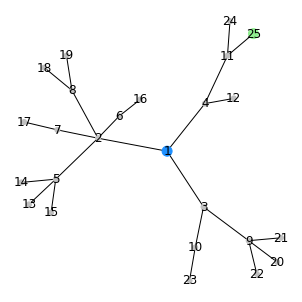

In [15]:
plt.figure(figsize=(fig_size,fig_size)) 
nx.draw(g, pos=my_pos, node_color = colors,node_size=sizes,with_labels=True)
plt.show()

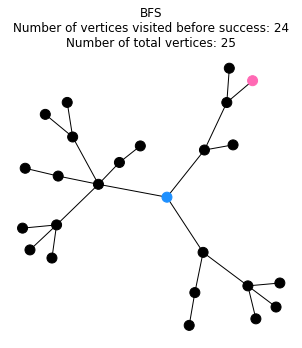

In [23]:
np.random.seed(123)
plt.figure(figsize=(fig_size,fig_size)) 

found_vertex, num_steps, visited = BFS(adjacency_dict, target)

BFS_colors = colors.copy()
BFS_sizes = sizes.copy()
for v in visited:
    if v != 1:
        BFS_colors[v-1] = "black"
        BFS_sizes[v - 1] = large_size
if found_vertex is not None:
    BFS_colors[found_vertex-1] = "hotpink"
nx.draw(g, pos=my_pos, node_color = BFS_colors, node_size = BFS_sizes,with_labels=False)
plt.title("BFS\nNumber of vertices visited before success: {}\nNumber of total vertices: {}".format(num_steps,max(adjacency_dict)))
plt.show()

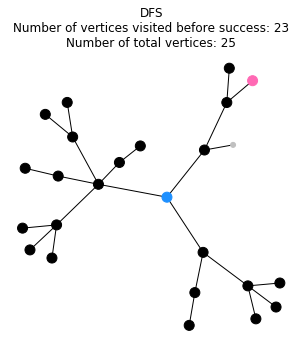

In [24]:
np.random.seed(123)
plt.figure(figsize=(fig_size,fig_size)) 


fv, ns, vd  = DFS(adjacency_dict, target, start = 1)
DFS_colors = colors.copy()
DFS_sizes = sizes.copy()
for v in vd:
    if v != 1:
        DFS_colors[v-1] = "black"
        DFS_sizes[v - 1] = large_size
if fv is not None:
    DFS_colors[fv-1] = "hotpink"
nx.draw(g, pos=my_pos, node_color = DFS_colors, node_size = DFS_sizes)
plt.title("DFS\nNumber of vertices visited before success: {}\nNumber of total vertices: {}".format(ns,max(adjacency_dict)))

plt.show()

# Minimum spanning tree

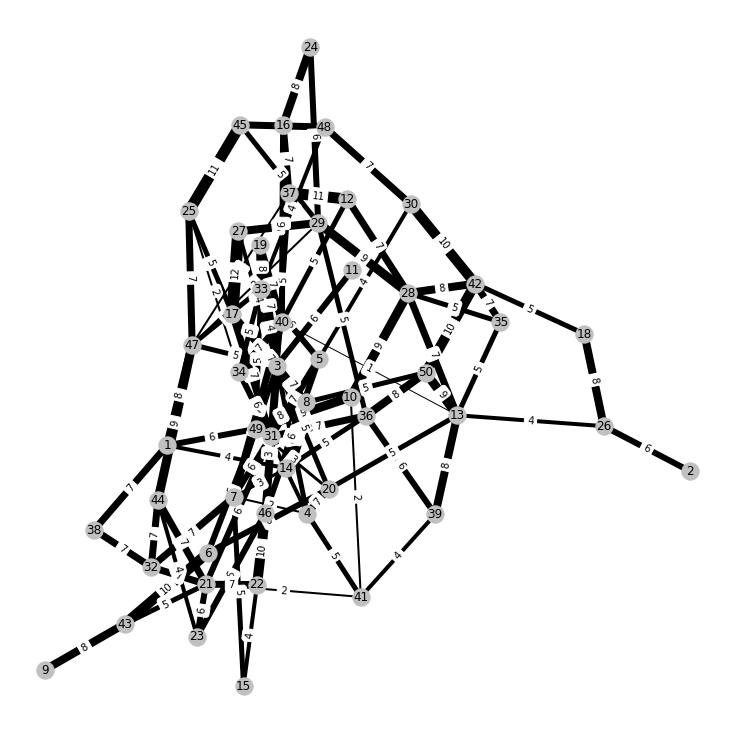

[(13, 40), (40, 13), (41, 21), (21, 41), (37, 47), (47, 37), (34, 25), (25, 34), (47, 29), (29, 47), (10, 41), (41, 10), (4, 7), (7, 4), (7, 14), (14, 7), (20, 49), (49, 20), (22, 40), (40, 22), (34, 4), (4, 34), (15, 22), (22, 15), (33, 3), (3, 33), (3, 27), (27, 3), (1, 14), (14, 1), (33, 48), (48, 33), (26, 13), (13, 26), (39, 41), (41, 39), (5, 30), (30, 5), (44, 23), (23, 44), (47, 33), (33, 47), (4, 3), (3, 4), (36, 29), (29, 36), (41, 4), (4, 41), (40, 12), (12, 40), (49, 33), (33, 49), (15, 7), (7, 15), (50, 8), (8, 50), (45, 29), (29, 45), (36, 14), (14, 36), (42, 18), (18, 42), (33, 34), (34, 33), (20, 3), (3, 20), (47, 3), (3, 47), (7, 3), (3, 7), (35, 13), (13, 35), (28, 35), (35, 28), (13, 20), (20, 13), (25, 17), (17, 25), (43, 21), (21, 43), (3, 37), (37, 3), (46, 23), (23, 46), (6, 49), (49, 6), (3, 11), (11, 3), (24, 29), (29, 24), (36, 39), (39, 36), (20, 6), (6, 20), (16, 40), (40, 16), (34, 31), (31, 34), (46, 5), (5, 46), (21, 23), (23, 21), (5, 33), (33, 5), (31, 

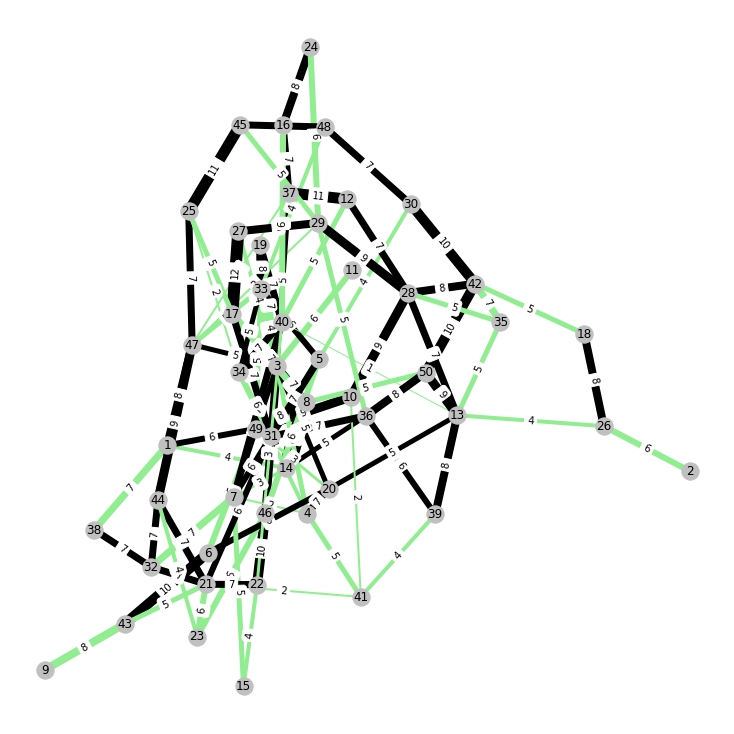

In [15]:
fig_size = 10
np.random.seed(123)
adj,weights = create_graph(50,20,True)
draw_adj(adj,weights,True)
tree, weight = kruskal(adj, weights)
print(weight)

draw_adj(adj,weights,True, tree)